In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from mlxtend.plotting import plot_decision_regions


In [2]:
adult = pd.read_csv('adult.csv')

In [3]:
adult.head()

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K.
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K.
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K.
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K.
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K.


In [4]:
# recode the output feature
adult['adult_new_income'] = adult['income'].replace(to_replace = ['<=50K.', '>50K.'], value = [int(0), int(1)])

In [5]:
adult.head()

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,adult_new_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K.,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K.,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K.,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K.,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K.,0


In [6]:
adult.value_counts('adult_new_income')

adult_new_income
0    19016
1     5984
Name: count, dtype: int64

In [7]:
#check for missing values
adult.isnull().sum()

age                 0
workclass           0
demogweight         0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country      0
income              0
adult_new_income    0
dtype: int64

In [8]:
adult.describe()

,age,demogweight,education-num,capital-gain,capital-loss,hours-per-week,adult_new_income
count,25000.000000,2.500000e+04,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000
mean,38.606920,1.897418e+05,10.081440,1088.579040,86.49992,40.407440,0.239360
std,13.687769,1.052947e+05,2.557035,7486.621197,401.25358,12.299267,0.426701
min,17.000000,1.228500e+04,1.000000,0.000000,0.00000,1.000000,0.000000
25%,28.000000,1.179630e+05,9.000000,0.000000,0.00000,40.000000,0.000000
50%,37.000000,1.783530e+05,10.000000,0.000000,0.00000,40.000000,0.000000
75%,48.000000,2.368610e+05,12.000000,0.000000,0.00000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.00000,99.000000,1.000000


In [9]:
# identify X and y
X = adult[['education-num', 'hours-per-week']]
y = adult[['adult_new_income']]

In [10]:
# standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
# create training and test set, and stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, stratify=y, random_state=12)

In [12]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (18750, 2)
y_train shape: (18750, 1)
X_test shape: (6250, 2)
y_test shape: (6250, 1)


In [13]:
# initialize models
logreg = LogisticRegression()
logreg.fit(X_train, np.ravel(y_train))
y_logpred = logreg.predict(X_test)

In [14]:
logreg_conf = confusion_matrix(y_test, y_logpred)
print(logreg_conf)

[[4499  255]
 [1124  372]]


In [15]:
lr_accuracy = metrics.accuracy_score(np.ravel(y_test), y_logpred)
lr_prediction = metrics.precision_score(np.ravel(y_test), y_logpred)
lr_recall =  metrics.recall_score(np.ravel(y_test), y_logpred)
print('lr accuracy:', lr_accuracy)
print('lr prediction:', lr_prediction)
print('lr_recall:', lr_recall)

lr accuracy: 0.77936
lr prediction: 0.5933014354066986
lr_recall: 0.24866310160427807


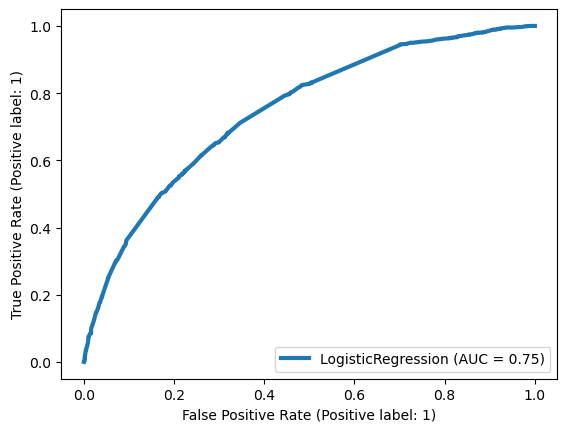

In [16]:
#ROC plot
lr_roc_plot = RocCurveDisplay.from_estimator(logreg, X_test, y_test, linewidth = 3)

<Axes: >

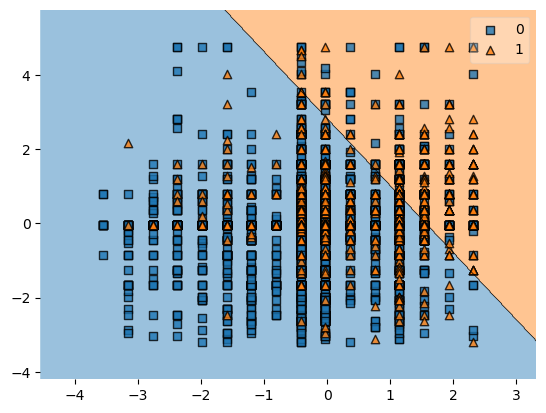

In [17]:
# plot decision regions
plot_decision_regions(X_test, np.ravel(y_test), clf = logreg)

In [18]:
# initialize knn model
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train, np.ravel(y_train))
y_knnpred = knn.predict(X_test)

In [19]:
knn_conf = confusion_matrix(y_test, y_knnpred)
print(knn_conf)

[[3972  782]
 [ 846  650]]


In [20]:
knn_accuracy = metrics.accuracy_score(np.ravel(y_test), y_knnpred)
knn_prediction = metrics.precision_score(np.ravel(y_test), y_knnpred)
knn_recall =  metrics.recall_score(np.ravel(y_test), y_knnpred)
print('knn accuracy:', knn_accuracy)
print('knn prediction:', knn_prediction)
print('knn recall:', knn_recall)

knn accuracy: 0.73952
knn prediction: 0.45391061452513964
knn recall: 0.4344919786096257


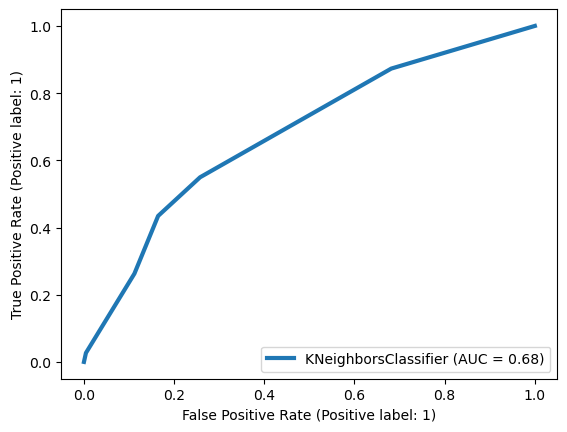

In [21]:
#ROC plot
knn_roc_plot = RocCurveDisplay.from_estimator(knn, X_test, y_test, linewidth = 3)

<Axes: >

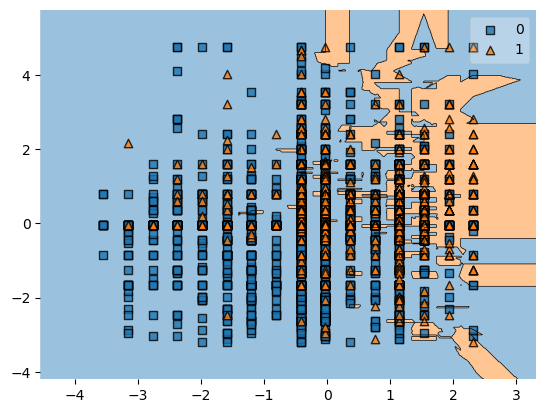

In [22]:
# plot decision regions
plot_decision_regions(X_test, np.ravel(y_test), clf = knn)

In [23]:
# initialize Gaussian model
gaussian_mod = GaussianNB()
gaussian_mod.fit(X_train, np.ravel(y_train))
y_gaussianpred = gaussian_mod.predict(X_test)

# fit and predict
gaussian_conf = confusion_matrix(y_test, y_gaussianpred)
print(gaussian_conf)

# print metrics
gaussian_accuracy = metrics.accuracy_score(np.ravel(y_test), y_gaussianpred)
gaussian_prediction = metrics.precision_score(np.ravel(y_test), y_gaussianpred)
gaussian_recall =  metrics.recall_score(np.ravel(y_test), y_gaussianpred)
print('gaussian accuracy:', gaussian_accuracy)
print('gaussian prediction:', gaussian_prediction)
print('gaussian recall:', gaussian_recall)

[[4457  297]
 [1075  421]]
gaussian accuracy: 0.78048
gaussian prediction: 0.5863509749303621
gaussian recall: 0.28141711229946526


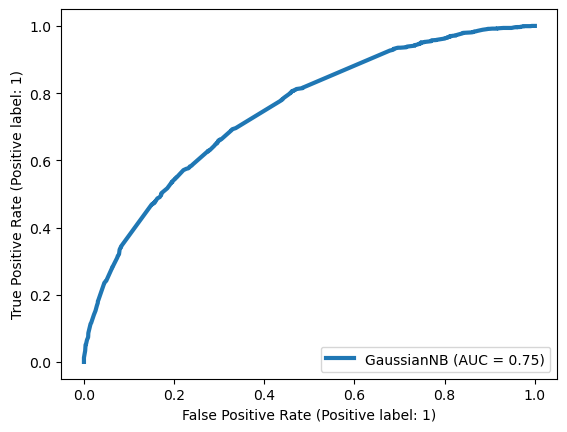

In [24]:
#ROC plot
gaussian_roc_plot = RocCurveDisplay.from_estimator(gaussian_mod, X_test, y_test, linewidth = 3)

<Axes: >

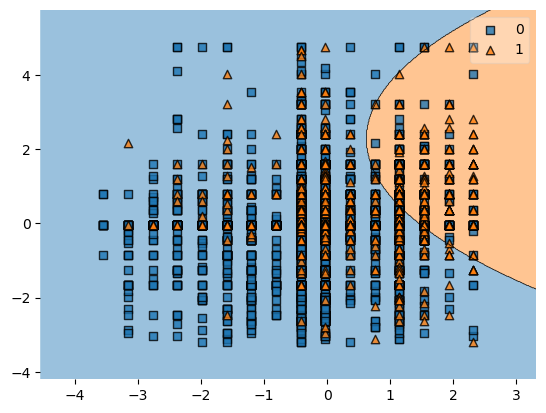

In [25]:
# plot decision regions
plot_decision_regions(X_test, np.ravel(y_test), clf = gaussian_mod)

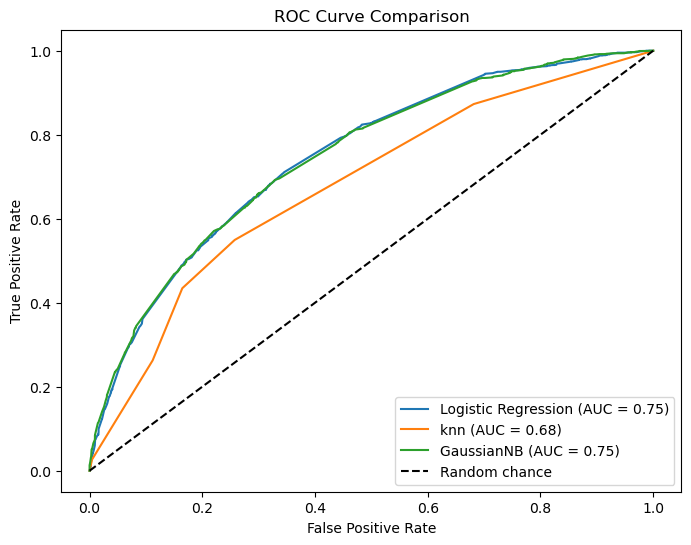

In [26]:
# plotting ROC curves on same graph
plt.figure(figsize=(8, 6))


RocCurveDisplay.from_estimator(logreg, X_test, y_test, ax=plt.gca(), name="Logistic Regression")
RocCurveDisplay.from_estimator(knn, X_test, y_test, ax=plt.gca(), name="knn")
RocCurveDisplay.from_estimator(gaussian_mod, X_test, y_test, ax=plt.gca(), name="GaussianNB")

# add diagonal line representing random chance
plt.plot([0, 1], [0, 1], 'k--', label='Random chance')


plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show the plot
plt.show()


In [27]:
print('lr accuracy:', lr_accuracy)
print('lr prediction:', lr_prediction)
print('lr_recall:', lr_recall, '\n')

print('knn accuracy:', knn_accuracy)
print('knn prediction:', knn_prediction)
print('knn recall:', knn_recall, '\n')

print('gaussian accuracy:', gaussian_accuracy)
print('gaussian prediction:', gaussian_prediction)
print('gaussian recall:', gaussian_recall)

lr accuracy: 0.77936
lr prediction: 0.5933014354066986
lr_recall: 0.24866310160427807 

knn accuracy: 0.73952
knn prediction: 0.45391061452513964
knn recall: 0.4344919786096257 

gaussian accuracy: 0.78048
gaussian prediction: 0.5863509749303621
gaussian recall: 0.28141711229946526


In [28]:
# use GridSearch for knn
k = {'n_neighbors': [3, 5,  7, 9, 11, 13, 15]}

knn_tuning = GridSearchCV(knn, k, cv=5)
knn_tuning.fit(X_train, np.ravel(y_train))

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15]})

In [29]:
knn_tuning.cv_results_

{'mean_fit_time': array([0.00801063, 0.00800004, 0.00656729, 0.00800033, 0.00959935,
        0.00719981, 0.00879931]),
 'std_fit_time': array([2.11024014e-05, 1.94044017e-06, 1.48328905e-03, 7.89305942e-07,
        1.95989777e-03, 1.60005109e-03, 1.60014689e-03]),
 'mean_score_time': array([0.10159979, 0.09244089, 0.0948741 , 0.09920001, 0.10723996,
        0.10072494, 0.09882412]),
 'std_score_time': array([0.00697598, 0.00267899, 0.00293017, 0.01647289, 0.01271569,
        0.00802779, 0.00905384]),
 'param_n_neighbors': masked_array(data=[3, 5, 7, 9, 11, 13, 15],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9},
  {'n_neighbors': 11},
  {'n_neighbors': 13},
  {'n_neighbors': 15}],
 'split0_test_score': array([0.7744    , 0.7752    , 0.7792    , 0.7888    , 0.788     ,
        0.7832    , 0.78693333]),
 'split1_test_s

In [30]:
print('Best estimator:', knn_tuning.best_estimator_)

Best estimator: KNeighborsClassifier(n_neighbors=15)


In [31]:
# generating validation curve values
k_val = [3, 5, 7, 9, 11, 13, 15]

train_scores, test_scores = validation_curve(KNeighborsClassifier(), X_train, np.ravel(y_train), param_range=k_val, 
                                                                                       param_name='n_neighbors', cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

print(train_scores)

[[0.77786667 0.749      0.6874     0.6912     0.68066667]
 [0.78113333 0.74673333 0.7634     0.7588     0.75886667]
 [0.78326667 0.74606667 0.76273333 0.7632     0.76213333]
 [0.7888     0.78553333 0.7826     0.77653333 0.75653333]
 [0.786      0.7916     0.7862     0.78033333 0.76773333]
 [0.78506667 0.7878     0.783      0.78373333 0.7652    ]
 [0.78626667 0.79193333 0.7876     0.78873333 0.78693333]]


Text(0, 0.5, 'Score')

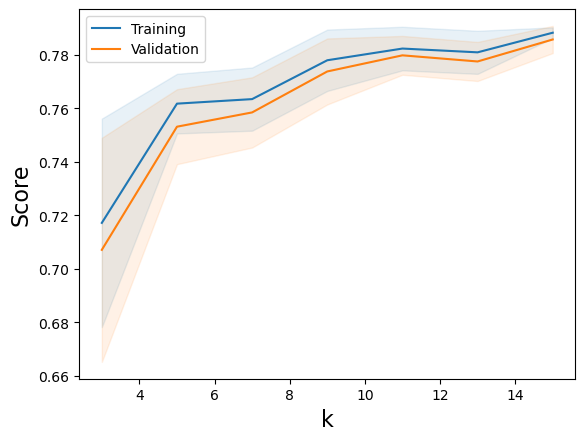

In [32]:
# Plot cross-validation results
sns.lineplot(x=k_val, y=train_scores_mean, label='Training', color='#1f77b4')
sns.lineplot(x=k_val, y=test_scores_mean, label='Validation', color='#ff7f0e')
plt.fill_between(k_val, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std, 
                 alpha=0.1, color='#1f77b4')
plt.fill_between(k_val, test_scores_mean-test_scores_std, test_scores_mean+test_scores_std, 
                 alpha=0.1, color='#ff7f0e')

plt.xlabel('k', fontsize=16)
plt.ylabel('Score', fontsize=16)

In [33]:
# initialize knn model
knn15 = KNeighborsClassifier(n_neighbors= 15)
knn15.fit(X_train, np.ravel(y_train))
y_knn15pred = knn15.predict(X_test)

knn15_conf = confusion_matrix(y_test, y_knn15pred)
print(knn15_conf)

knn15_accuracy = metrics.accuracy_score(np.ravel(y_test), y_knn15pred)
knn15_prediction = metrics.precision_score(np.ravel(y_test), y_knn15pred)
knn15_recall =  metrics.recall_score(np.ravel(y_test), y_knn15pred)
print('knn15 accuracy:', knn15_accuracy)
print('knn15 prediction:', knn15_prediction)
print('knn15 recall:', knn15_recall)

[[4336  418]
 [ 998  498]]
knn15 accuracy: 0.77344
knn15 prediction: 0.5436681222707423
knn15 recall: 0.33288770053475936


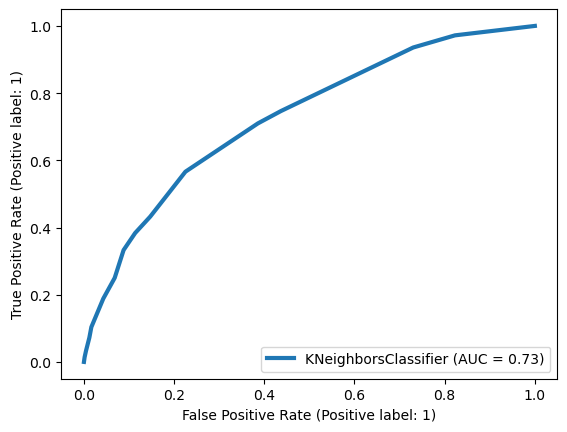

In [34]:
#ROC plot
knn15_roc_plot = RocCurveDisplay.from_estimator(knn15, X_test, y_test, linewidth = 3)